# Interatomic force field (IFF) optimization for W-based metal alloys

## Input data preparation

Author: Lukas Vlcek

Start Date: 2018-04-22

### Explore spline potentials

In [1]:
%matplotlib inline
import sys
import re
import numpy as np
import matplotlib.pyplot as plt

### Tungsten EAM IFF functions and parameters from Marinica et al. (corrected)

In [158]:
# Gauge conversion perameters
C = 1.848055990
S = 2.232322602e-1

# electronic density function (cubic splines)
rho = lambda r, a, k: sum([c*(p - r)**3 for c, p in zip(a, k) if r < p])

# embedding function
F = lambda d, a: a[0]*d**0.5 + a[1]*d + a[2]*d**2
F_new = lambda d, a: a[0]*d**0.5 + a[1]*d**2


Fc = lambda d, a: a[0] + a[1]*d + a[2]*d**2 + a[3]*d**3
Fe = lambda d, a: F(d/S, a) + C/S*d
Fa = lambda d, a1, a2: Fe(d, a1) if d < 1.359141225 else Fc(d, a2)

# pair potential function (same spline form as electronic density)
V = rho

In [159]:
# electronic density parameters
rho_re_a = [3.704045964e-3]
rho_re_r = [5.46]

# embeding function parameters
F_re_a = [-7.046791948, 1.23658472, 1.143405627]
#F_re_a = [-7.046791948, 0, 1.143405627]

# pair potential
V_re_a = [6.726805309, 3.217593889, -6.545857587e-1, 1.453229484e-1, -2.063629464e-1, 6.114909116e-2]
V_re_r = [2.7, 3.252, 3.804, 4.356, 4.908, 5.46]

In [160]:
def utot_re(x):
    u = 6*V(x, V_re_a, V_re_r)
    d = 12*rho(x, rho_re_a, rho_re_r)
    u += F(d, F_re_a)
    return u/12

def u_manybody_re(x):
    d = 12*rho(x, rho_re_a, rho_re_r)
    u = F(d, F_re_a)
    return u/12

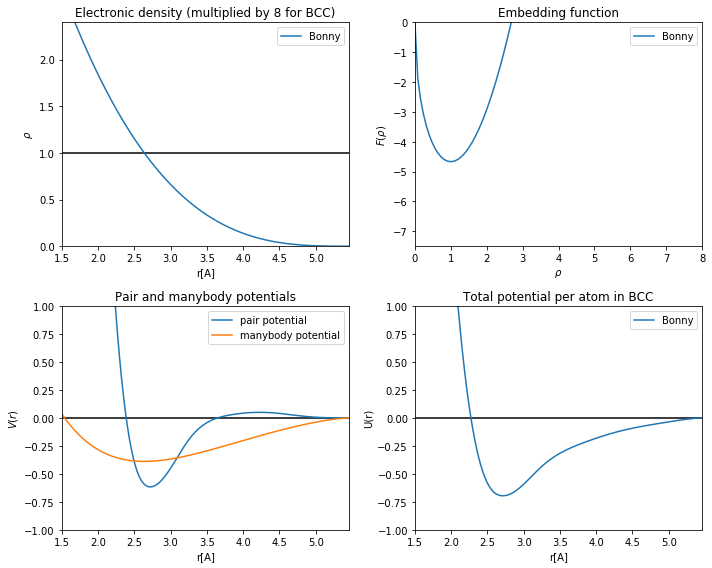

In [161]:
# plot the functions and potentials
rcut = 5.46
r = np.linspace(0., rcut, 201)

plt.figure(figsize=(10,8))

# Electronic density
dens = [rho(x, rho_re_a, rho_re_r)*12 for x in r]
plt.subplot(221)
plt.title('Electronic density (multiplied by 8 for BCC)')
plt.plot(r, dens, label='Bonny')
plt.legend()
plt.hlines(1.0, 1.5, rcut)
plt.axis([1.5, rcut, 0, 0.3*8])
plt.xlabel('r[A]')
plt.ylabel(r'$ \rho $')

# Embedding function
dens = np.linspace(0., 8., 101)
embed = [F(d, F_re_a) for d in dens]
plt.subplot(222)
plt.title('Embedding function')
plt.plot(dens, embed, label='Bonny')
plt.legend()
plt.axis([0, 8, -7.5, 0.0])
plt.xlabel(r'$\rho$')
plt.ylabel(r'$F(\rho)$')

# Pair and manybody potentials
pot = [V(x, V_re_a, V_re_r) for x in r]
pot_manybody = [u_manybody_re(x) for x in r]
plt.subplot(223)
plt.title('Pair and manybody potentials')
plt.plot(r, pot, label='pair potential')
plt.plot(r, pot_manybody, label='manybody potential')
plt.legend()
plt.hlines(0.0, 1.5, rcut)
plt.axis([1.5, rcut, -1.0, 1.0])
plt.xlabel('r[A]')
plt.ylabel(r'$V(r)$')

# Total potential per atom (bulk)
pot = [utot_re(x) for x in r]
plt.subplot(224)
plt.title('Total potential per atom in BCC')
plt.plot(r, pot, label='Bonny')
plt.legend()
plt.hlines(0.0, 1.5, rcut)
plt.axis([1.5, rcut, -1, 1.0])
plt.xlabel('r[A]')
plt.ylabel(r'U(r)')

plt.tight_layout()

In [209]:
# electronic density parameters
rho_x_a = [1.0]
rho_x_r = [5.48]

# embeding function parameters
#F_re_a = [-7.046791948, 0, 1.143405627]
#F_x_a = [-7.046791948, 1.23658472, 1.143405627]
F_x_a = [-7.046791948, 0.0, 1.143405627]



#3.704045964e-3

# pair potential
V_x_a = [x*2 for x in V_re_a][:]
#V_x_r = [2.74, 3.25, 3.75, 4.5, 5.48]
#V_x_r = [2.75, 3.25, 3.75, 4.356, 5.0, 5.5]
V_x_r = [2.5, 2.75, 3.25, 3.75, 4.25, 4.75, 5.25, 5.75]

V_x_a += [0.0, 0.0]
V_x_a

[13.453610618,
 6.435187778,
 -1.3091715174,
 0.2906458968,
 -0.4127258928,
 0.12229818232,
 0.0,
 0.0]

In [210]:
def utot_re(x):
    u = 6*V(x, V_re_a, V_re_r)
    d = 12*rho(x, rho_re_a, rho_re_r)
    u += F(d, F_re_a)
    return u/12

def u_manybody_re(x):
    d = 12*rho(x, rho_re_a, rho_re_r)
    u = F(d, F_re_a)
    return u/12


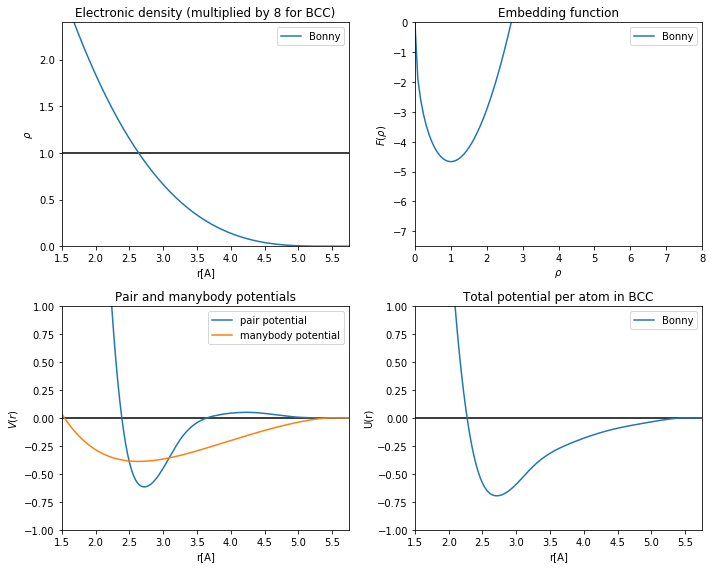

In [211]:
# plot the functions and potentials
rcut = 5.75
r = np.linspace(0., rcut, 201)

plt.figure(figsize=(10,8))

# Electronic density
dens = [rho(x, rho_re_a, rho_re_r)*12 for x in r]
plt.subplot(221)
plt.title('Electronic density (multiplied by 8 for BCC)')
plt.plot(r, dens, label='Bonny')
plt.legend()
plt.hlines(1.0, 1.5, rcut)
plt.axis([1.5, rcut, 0, 0.3*8])
plt.xlabel('r[A]')
plt.ylabel(r'$ \rho $')

# Embedding function
dens = np.linspace(0., 8., 101)
embed = [F(d, F_re_a) for d in dens]
plt.subplot(222)
plt.title('Embedding function')
plt.plot(dens, embed, label='Bonny')
plt.legend()
plt.axis([0, 8, -7.5, 0.0])
plt.xlabel(r'$\rho$')
plt.ylabel(r'$F(\rho)$')

# Pair and manybody potentials
pot = [V(x, V_re_a, V_re_r) for x in r]
pot_manybody = [u_manybody_re(x) for x in r]
plt.subplot(223)
plt.title('Pair and manybody potentials')
plt.plot(r, pot, label='pair potential')
plt.plot(r, pot_manybody, label='manybody potential')
plt.legend()
plt.hlines(0.0, 1.5, rcut)
plt.axis([1.5, rcut, -1.0, 1.0])
plt.xlabel('r[A]')
plt.ylabel(r'$V(r)$')

# Total potential per atom (bulk)
pot = [utot_re(x) for x in r]
plt.subplot(224)
plt.title('Total potential per atom in BCC')
plt.plot(r, pot, label='Bonny')
plt.legend()
plt.hlines(0.0, 1.5, rcut)
plt.axis([1.5, rcut, -1, 1.0])
plt.xlabel('r[A]')
plt.ylabel(r'U(r)')

plt.tight_layout()

In [212]:
# fit pair potential
def udif(p, r):
    uref = [V(x, V_re_a, V_re_r) for x in r]
    utry = [V(x, p, V_x_r) for x in r]
    return uref, utry

def uloss(p, r):
    uref = [V(x, V_re_a, V_re_r) for x in r]
    utry = [V(x, p, V_x_r) for x in r]
    loss = sum([(a-b)**2 for a, b in zip(uref, utry)])
    return loss

In [213]:
from scipy.optimize import fmin
par_in = V_x_a
output = fmin(uloss, par_in, args=(r,), maxiter=100000, maxfun=100000, disp=0, full_output=1,ftol=1e-6)
pair_new = output[0]
print(*pair_new)

0.4527535290774057 7.091857873610367 1.6314949612839302 0.7906877956550405 -0.8249673243680319 0.14501087706040938 -0.002061634677032549 0.0021894588902290147


Text(0,0.5,'$V(r)$')

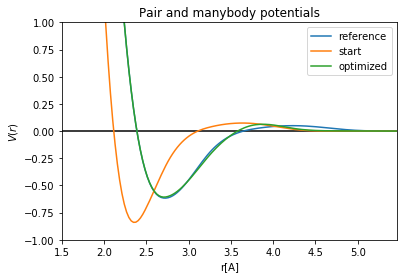

In [214]:
rcut = 5.46
r = np.linspace(0., rcut, 201)

uref, utry = udif(V_x_a, r)
uref, uopt = udif(pair_new, r)

plt.title('Pair and manybody potentials')
plt.plot(r, uref, label='reference')
plt.plot(r, utry, label='start')
plt.plot(r, uopt, label='optimized')

plt.legend()
plt.hlines(0.0, 1.5, rcut)
plt.axis([1.5, rcut, -1.0, 1.0])
plt.xlabel('r[A]')
plt.ylabel(r'$V(r)$')

In [215]:
# fit manybody potential
def u_manybody_dif(p, r):
    uref = [F(12*rho(x, rho_re_a, rho_re_r), F_re_a)/12 for x in r]
    utry = [F_new(12*rho(x, rho_x_a, rho_x_r), p)/12 for x in r]
    return uref, utry

def u_manybody_loss(p, r):
    uref = [F(12*rho(x, rho_re_a, rho_re_r), F_re_a)/12 for x in r]
    utry = [F_new(12*rho(x, rho_x_a, rho_x_r), p)/12 for x in r]
    loss = sum([(a-b)**2 for a, b in zip(uref, utry)])
    return loss

In [216]:
rho_x_a = [1.0]
r = np.linspace(0., rcut, 201)
par_in = [F_re_a[0], F_re_a[2]]
output = fmin(u_manybody_loss, par_in, args=(r,), maxiter=100000, maxfun=100000, disp=0, full_output=1,ftol=1e-6)
many_new = output[0]
print(*many_new)

-0.344540412587315 1.6869558429105695e-05


[-7.046791948, 1.23658472, 1.143405627]


Text(0,0.5,'$V(r)$')

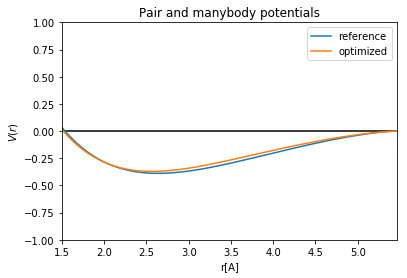

In [217]:
rcut = 5.46
r = np.linspace(0., rcut, 201)
print(F_re_a)
uref, utry = u_manybody_dif(F_re_a, r)
uref, uopt = u_manybody_dif(many_new, r)

plt.title('Pair and manybody potentials')
plt.plot(r, uref, label='reference')
#plt.plot(r, utry, label='start')
plt.plot(r, uopt, label='optimized')

plt.legend()
plt.hlines(0.0, 1.5, rcut)
plt.axis([1.5, rcut, -1.0, 1.0])
plt.xlabel('r[A]')
plt.ylabel(r'$V(r)$')

In [218]:
many_x = list(many_new)
pair_x = list(pair_new)

In [219]:
print(many_x + pair_x)

[-0.344540412587315, 1.6869558429105695e-05, 0.4527535290774057, 7.091857873610367, 1.6314949612839302, 0.7906877956550405, -0.8249673243680319, 0.14501087706040938, -0.002061634677032549, 0.0021894588902290147]


In [220]:
pars_in = {'pair':pair_x, 'embed':many_x}
import pickle
with open('../data/working/pars_in.pickle', 'wb') as fo:
    pickle.dump(pars_in, fo)

In [188]:
def utot_opt(x, pn, mn):
    u = 6*V(x, pn, V_x_r)
    d = 12*rho(x, rho_x_a, rho_x_r)
    u += F_new(d, mn)
    return u/12

Text(0,0.5,'U(r)')

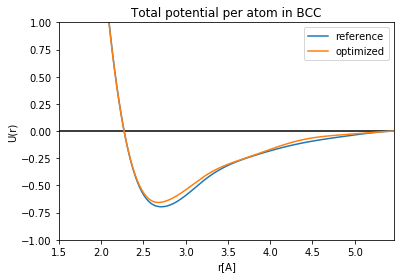

In [189]:
pot = [utot_re(x) for x in r]
pot_new = [utot_opt(x, pair_new, many_new) for x in r]

plt.title('Total potential per atom in BCC')
plt.plot(r, pot, label='reference')
plt.plot(r, pot_new, label='optimized')
plt.legend()
plt.hlines(0.0, 1.5, rcut)
plt.axis([1.5, rcut, -1, 1.0])
plt.xlabel('r[A]')
plt.ylabel(r'U(r)')

In [190]:
# modified functions
many_x = [x for x in many_new]
many_x[1] = 0.0

pair_x = [x for x in pair_new]
pair_x[-1] += 2*many_new[1]

In [191]:
print(pair_x)
print(many_x)

[7.262799609949834, 2.8551814788414784, -1.1750824011719558, 0.5925315310384949, -0.41006381316375573, 0.11876321014440062]
[-0.344540412587315, 0.0]


In [120]:
pair_new

array([ 0.83073149,  6.3064633 ,  2.56944634, -0.21327208, -0.2225459 ,
        0.02275643])

In [121]:
many_new

array([-4.09342761e-01,  3.54237104e-03,  1.53203715e-05])

In [96]:
many_x = [many_x[0], 0.0, 0.0]

Text(0,0.5,'U(r)')

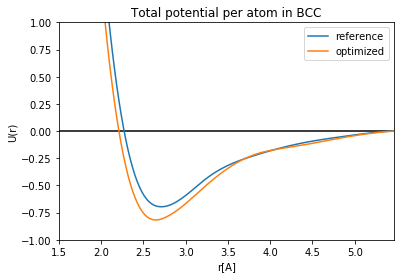

In [97]:
pot = [utot_re(x) for x in r]
pot_new = [utot_opt(x, pair_x, many_x) for x in r]

plt.title('Total potential per atom in BCC')
plt.plot(r, pot, label='reference')
plt.plot(r, pot_new, label='optimized')
plt.legend()
plt.hlines(0.0, 1.5, rcut)
plt.axis([1.5, rcut, -1, 1.0])
plt.xlabel('r[A]')
plt.ylabel(r'U(r)')

In [79]:
print('pair potentail parameters:', *pair_x)
print('embedding function parameters:', *many_x)

pair potentail parameters: 0.8307314918975489 6.306463298847209 2.569446338927059 -0.21327208205268988 -0.22254590199235236 0.02984117320348275
embedding function parameters: -0.4093427610992626 0.0 0.0


In [202]:
pwd

'/Users/l2v/work/force_fields/eam-models/notebooks'